<a href="https://colab.research.google.com/github/k-venky-reddy/Projects/blob/main/Sentimental_analysis_on_Restaurent_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis of Restarent reviews/Restaurant_Reviews (1).tsv', sep='\t')

In [15]:
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [16]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [17]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [19]:
df.groupby('Liked').describe()

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

In [20]:
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [21]:
df.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [22]:
df_149 =df[df['Length'] == 149]['Review']
for message in df_149:
    print(message)

The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).


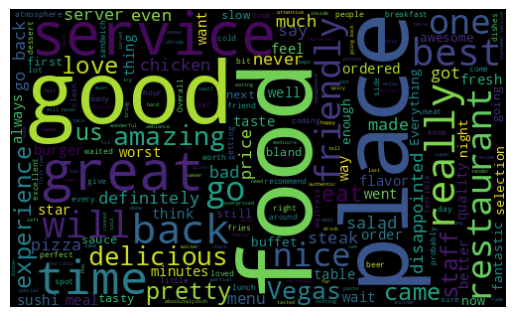

In [23]:
# Data Visualizations
from wordcloud import WordCloud
all_messages = ' '.join(df['Review'])
wordCloud = WordCloud(width=500, height=300, random_state=20, max_font_size=100).generate(all_messages)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

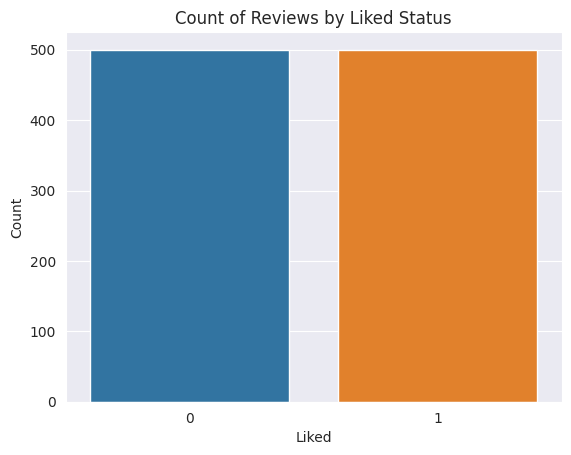

In [24]:
sns.set_style('darkgrid')
sns.countplot(x='Liked', data=df)
plt.title('Count of Reviews by Liked Status')
plt.xlabel('Liked')
plt.ylabel('Count')
plt.show()

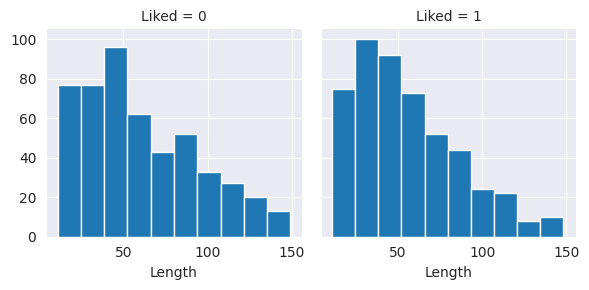

In [25]:
g = sns.FacetGrid(df, col='Liked')
g.map(plt.hist, 'Length');

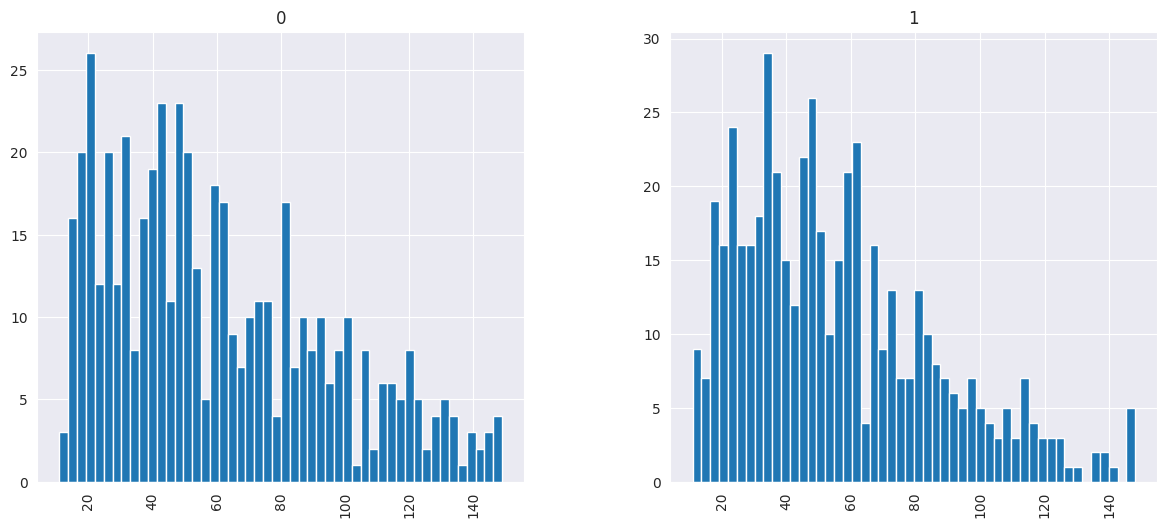

In [26]:
df.hist(column='Length', by='Liked', bins=50,figsize=(14,6));

In [27]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Liked,Length
Liked,1.000000,-0.075285
Length,-0.075285,1.000000


<ipython-input-28-6cd9d780520a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm');


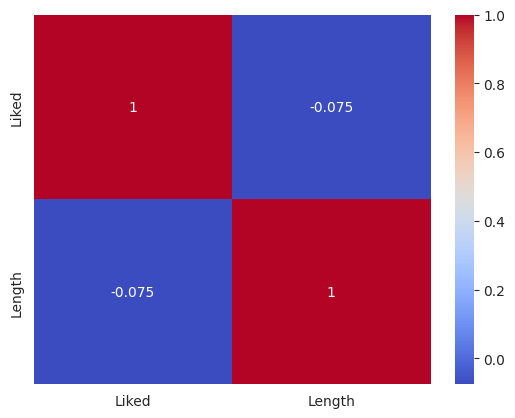

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [29]:
# Data Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X =df['Review'].str.lower()
y = df['Liked']
X = cv.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [31]:
# Naives Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [32]:
nb.fit(X_train,y_train)

MultinomialNB()

In [33]:
predictions = nb.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
print(confusion_matrix(y_test,predictions))

[[115  35]
 [ 30 120]]


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       150
           1       0.77      0.80      0.79       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),])  # train on TF-IDF vectors, Naive Bayes classifier

In [40]:
X = df['Review']
y = df['Liked']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [41]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [42]:
predictions = pipeline.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[111  39]
 [ 23 127]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       150
           1       0.77      0.85      0.80       150

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



In [44]:
#logistic regression

from sklearn import linear_model

In [45]:
logr=linear_model.LogisticRegression()

In [46]:
X = cv.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [48]:
logr.fit(X_train,y_train)

LogisticRegression()

In [49]:
logpredictions = logr.predict(X_test)

In [50]:
print(confusion_matrix(y_test,logpredictions))

[[119  31]
 [ 21 129]]


In [51]:
print(classification_report(y_test,logpredictions))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       150
           1       0.81      0.86      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

